## Computation

Five examples of pairs of functions ƒ and g such that ƒ is ƒ O(G).

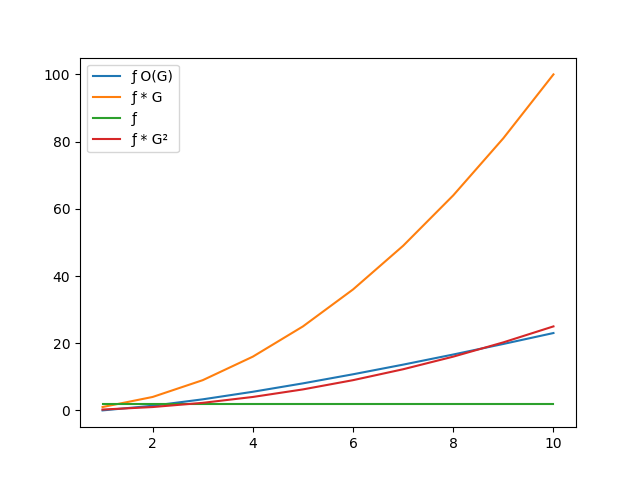

In [18]:
import math
import matplotlib.pyplot as plt

foG = []
fG = []
fC = []
fG2 = []
fGFac = []

for i in range(1, 11):
    foG.append(i * math.log(i))
    fG.append(i ** 2)
    fC.append(2)
    fG2.append((i/2) * (i/2))
    #fGFac.append(math.factorial((i/2)))
    
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,]
  
# plot lines
plt.plot(y, foG, label = "ƒ O(G)")
plt.plot(y, fG, label = "ƒ * G")
plt.plot(y, fC, label = "ƒ")
plt.plot(y, fG2, label = "ƒ * G²")
#plt.plot(y, fGFac, label = "G!")
plt.legend()
plt.show()

# import image module
from IPython.display import Image

# get the image
Image(url="https://miro.medium.com/max/720/1*j8fUQjaUlmrQEN_udU0_TQ.jpeg", width=600, height=600)


## Exercise 2

Change the above code to only accept inputs that do not contain any 1's.

In [2]:
# State table.
table = {
    ('X', '_'): ['_', 'R', 'T'],
    ('X', '0'): ['0', 'R', 'X'],
    ('X', '1'): ['1', 'R', 'Y'],
    ('Y', '_'): ['_', 'R', 'F'],
    ('Y', '0'): ['0', 'R', 'Y'],
    ('Y', '1'): ['1', 'R', 'X'],
}

# Tape input.
tape = list('0101111')
# Position on tape.
pos = 0
# Initial state is first in table.
state = 'X'



# Keep going while we are not in a halting state.
while state not in ['T', 'F',]:
    # Print the current status.
    print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
    # Get the row of the table.
    row = table[(state, tape[pos])]
    # Overwrite the symbol.
    tape[pos] = row[0]
    # Move left or right.
    if row[1] == 'R':
        # Put blanks on tape as necessary.
        if pos == len(tape) - 1:
            tape = tape + ['_']
        # Increase position.
        pos = pos + 1
    else:
        # Put blanks on tape as necessary.
        if pos == 0:
            tape = ['_'] + tape
            # The position on the tape has to move with it.
            pos = pos + 1
        # Decrease position.
        pos = pos - 1
    # Update the state.
    state = row[2]

    
# Print the current status.
print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))

X0101111
0X101111
01Y01111
010Y1111
0101X111
01011Y11
010111X1
0101111Y_
0101111_F_
